# Code for creating dataframes out of the ball-event data, and for creating and visualizing the possession chains of the teams

In [2]:
#import packages
import csv
import xml.etree.ElementTree as et
import numpy as np
import pandas as pd
from datetime import datetime as dt

In [3]:
#Creating a dataframe for the ball-event data
#unfortunately, I couldn't export the documentation from opta. So, I had to label everything by hand
def create_event_dataframe(f24_file, metadata_file):
    tree = et.ElementTree(file = f24_file)
    gameFile = tree.getroot()
    team_dict = {gameFile[0].attrib["home_team_id"]: 'Home',
    gameFile[0].attrib["away_team_id"]: 'Away'}
    main_id = []
    event_id = []
    type_id = []
    half = []
    frame_id = []
    minute = []
    seconds = []
    team_id = []
    team = []
    outcome = []
    x_origin = []
    y_origin = []
    x_destination = []
    y_destination = []
    
    tree2 = et.ElementTree(file = metadata_file)
    meta_data = tree2.getroot()
    start_of_halves = []
    end_of_halves = []
    for i in meta_data:
        for j in i:
            start_of_halves.append(j.attrib.get("iStartFrame"))
            end_of_halves.append(j.attrib.get("iEndFrame"))

    for game in gameFile:
    
        #Iterate through each event
        for event in game:
        
            #To the correct list, append the correct attribute using attrib.get()
            main_id.append(event.attrib.get("id"))
            event_id.append(event.attrib.get("event_id"))
            type_id.append(event.attrib.get("type_id"))
            half.append(event.attrib.get("period_id"))
            frame_id.append((int(event.attrib.get("min")) * 60 + int(event.attrib.get("sec")))*25)
            minute.append(event.attrib.get("min"))
            seconds.append(event.attrib.get("sec"))
            team_id.append(event.attrib.get("team_id"))
            team.append(team_dict[event.attrib.get("team_id")])
            outcome.append(event.attrib.get("outcome"))
            x_origin.append(event.attrib.get("x"))
            y_origin.append(event.attrib.get("y"))
            x_destination.append("")
            y_destination.append("")

            
            #Iterate through each qualifier 
            for qualifier in event:
                
                #If the qualifier is relevant, append the information to the x or y destination lists
                if qualifier.attrib.get("qualifier_id") == "140":
                    x_destination[-1] = qualifier.attrib.get("value")
                if qualifier.attrib.get("qualifier_id") == "141":
                    y_destination[-1] = qualifier.attrib.get("value")
    
    #Create a list of our 8 columns/lists
    column_titles = ["main_id", "event_id", "type_id", "half", "frame_id", "minute", "seconds", "team_id", "team", "outcome", "x_origin", "y_origin", "x_destination", "y_destination"]
            
    #Use pd.DataFrame to create our table, assign the data in the order of our columns and give it the column titles above
    final_table = pd.DataFrame(data=[main_id, event_id, type_id, half, frame_id, minute, seconds, team_id, team, outcome, x_origin, y_origin, x_destination, y_destination], index=column_titles)

    #Transpose, or flip, the table. Otherwise, our table will run from left to right, rather than top to bottom
    final_table = final_table.T
    
    for i in range(len(final_table)):
        if final_table.iloc[i]['half'] == '1':
            final_table['frame_id'][i] = int(start_of_halves[0]) + int(final_table.iloc[i]['frame_id'])
        elif final_table.iloc[i]['half'] == '2':
            final_table['frame_id'][i] = int(start_of_halves[1]) + int(final_table.iloc[i]['frame_id']) - 45*60*25
    
    name_of_types = []
    for i in range(len(final_table)):
        if final_table['type_id'][i] == '1':
            name_of_types.append("Pass")
        elif final_table['type_id'][i] == '2':
            name_of_types.append("Offside pass")
        elif final_table['type_id'][i] == '3':
            name_of_types.append("Attempted dribble")
        elif final_table['type_id'][i] == '4':
            name_of_types.append("Foul commited")
        elif final_table['type_id'][i] == '5':
            name_of_types.append("out")
        elif final_table['type_id'][i] == '6':
            name_of_types.append("Corner awarded")
        elif final_table['type_id'][i] == '7':
            name_of_types.append("Tackle")
        elif final_table['type_id'][i] == '8':
            name_of_types.append("Interception")
        elif final_table['type_id'][i] == '10':
            name_of_types.append("Goalkeeper save")
        elif final_table['type_id'][i] == '11':
            name_of_types.append("Goalkeeper catches cross")
        elif final_table['type_id'][i] == '12':
            name_of_types.append("Defensive clearance")
        elif final_table['type_id'][i] == '13':
            name_of_types.append("Shot missed wide")
        elif final_table['type_id'][i] == '14':
            name_of_types.append("Ball hits frame of the goal")
        elif final_table['type_id'][i] == '15':
            name_of_types.append("Shot attempt saved")
        elif final_table['type_id'][i] == '16':
            name_of_types.append("Goal")
        elif final_table['type_id'][i] == '17':
            name_of_types.append("Card")
        elif final_table['type_id'][i] == '18':
            name_of_types.append("Player substituted off")
        elif final_table['type_id'][i] == '19':
            name_of_types.append("Player substituted on")
        elif final_table['type_id'][i] == '20':
            name_of_types.append("Player retired")
        elif final_table['type_id'][i] == '21':
            name_of_types.append("Player returns on pitch")
        elif final_table['type_id'][i] == '22':
            name_of_types.append("Player becomes goalkeeper")
        elif final_table['type_id'][i] == '23':
            name_of_types.append("Goalkeeper becomes player")
        elif final_table['type_id'][i] == '24':
            name_of_types.append("Condition change")
        elif final_table['type_id'][i] == '25':
            name_of_types.append("Change in official")
        elif final_table['type_id'][i] == '27':
            name_of_types.append("Start Delay")
        elif final_table['type_id'][i] == '28':
            name_of_types.append("End delay")
        elif final_table['type_id'][i] == '30':
            name_of_types.append("End period")
        elif final_table['type_id'][i] == '32':
            name_of_types.append("Start period")
        elif final_table['type_id'][i] == '34':
            name_of_types.append("Team setup")
        elif final_table['type_id'][i] == '35':
            name_of_types.append("Player changed position")
        elif final_table['type_id'][i] == '36':
            name_of_types.append("Player changed jersey number")
        elif final_table['type_id'][i] == '37':
            name_of_types.append("Data collection end")
        elif final_table['type_id'][i] == '38':
            name_of_types.append("Temporary goal")
        elif final_table['type_id'][i] == '39':
            name_of_types.append("Temporary attempt")
        elif final_table['type_id'][i] == '40':
            name_of_types.append("Formation change")
        elif final_table['type_id'][i] == '41':
            name_of_types.append("Goalkeeper punch")
        elif final_table['type_id'][i] == '42':
            name_of_types.append("Good player skill")
        elif final_table['type_id'][i] == '43':
            name_of_types.append("Deleted event")
        elif final_table['type_id'][i] == '44':
            name_of_types.append("Aerial duel")
        elif final_table['type_id'][i] == '45':
            name_of_types.append("Unsuccessful tackle")
        elif final_table['type_id'][i] == '49':
            name_of_types.append("Ball recovery")
        elif final_table['type_id'][i] == '50':
            name_of_types.append("Dispossessed")
        elif final_table['type_id'][i] == '51':
            name_of_types.append("Error leading to shot or goal")
        elif final_table['type_id'][i] == '52':
            name_of_types.append("Goalkeeper picks up the ball")
        elif final_table['type_id'][i] == '53':
            name_of_types.append("Goalkeeper fails to interrupt cross")
        elif final_table['type_id'][i] == '54':
            name_of_types.append("Goalkeeper covers a ground ball")
        elif final_table['type_id'][i] == '55':
            name_of_types.append("Offside provoked")
        elif final_table['type_id'][i] == '56':
            name_of_types.append("Shield ball that goes out of play")
        elif final_table['type_id'][i] == '57':
            name_of_types.append("Incorrect throw-in")
        elif final_table['type_id'][i] == '58':
            name_of_types.append("Goalkeeper faces penalty")
        elif final_table['type_id'][i] == '59':
            name_of_types.append("Goalkeeper comes off the line to clear or claim the ball")
        elif final_table['type_id'][i] == '60':
            name_of_types.append("Chance missed (no shot)")
        elif final_table['type_id'][i] == '61':
            name_of_types.append("Bad touch and lost possession")
        elif final_table['type_id'][i] == '63':
            name_of_types.append("Temporary save")
        elif final_table['type_id'][i] == '64':
            name_of_types.append("Match resumes after the game was abandoned")
        elif final_table['type_id'][i] == '65':
            name_of_types.append("Contentious referee decision")
        elif final_table['type_id'][i] == '67':
            name_of_types.append("2 players running for a loose ball")
        elif final_table['type_id'][i] == '68':
            name_of_types.append("Referee drop ball")
        elif final_table['type_id'][i] == '70':
            name_of_types.append("Injury time announcement")
        elif final_table['type_id'][i] == '71':
            name_of_types.append("Coach setup")
        elif final_table['type_id'][i] == '74':
            name_of_types.append("Blocked pass")
        elif final_table['type_id'][i] == '75':
            name_of_types.append("Delayed start")
        elif final_table['type_id'][i] == '76':
            name_of_types.append("Early end")
        elif final_table['type_id'][i] == '77':
            name_of_types.append("Player off pitch")
        elif final_table['type_id'][i] == '79':
            name_of_types.append("Coverage interruption")
        elif final_table['type_id'][i] == '80':
            name_of_types.append("Goalkeeper drops ball")
        elif final_table['type_id'][i] == '81':
            name_of_types.append("Ball touches a non-player object")
        elif final_table['type_id'][i] == '83':
            name_of_types.append("Unsuccessful tackle")
    final_table.insert(3, 'type_name', name_of_types)
    
    return final_table

In [4]:
#create the event dataframe for a ball-event data match file and export it to excel
final_table = create_event_dataframe("1061416_f24.xml", '1061416_metadata.xml')
final_table.to_excel('1061416_events.xlsx')

In [12]:
#create separate dataframes for the first and second half of single events
#some events are deleted since these were not relevant. For example: injury time announcement and coach setup
#Furthermore, this function creates dataframes of the first and second half possession chains
def create_first_and_second_half_possession_chains(event_dataframe):
    new_table_first_half = final_table.loc[event_dataframe['half'] == '1']
    new_table_first_half.reset_index(drop=True, inplace=True)
    new_table_first_half.head()
    new_table_second_half = event_dataframe.loc[final_table['half'] == '2']
    new_table_second_half.reset_index(drop=True, inplace=True)
    new_table_second_half.head()
    #events types that could be deleted
    dont_include = ['17', '18', '19', '20', '21', '22', '23', '24', '25', '27', '28', '32', '34', '35', '36', '37', '38', '39', '40', '42', '43', '55', '56', '57', '60', '63', '64', '65', '67', '68', '70', '71', '75', '76', '77']
    first_half_possession_chains = new_table_first_half.loc[~new_table_first_half['type_id'].isin(dont_include)]
    second_half_possession_chains = new_table_second_half.loc[~new_table_second_half['type_id'].isin(dont_include)]
    first_half_possession_chains.reset_index(drop=True, inplace=True)
    second_half_possession_chains.reset_index(drop=True, inplace=True)

    #first half possession chains
    possession_chains = []
    i = 0
    possession_chain = []
    #only include passes, dribbles, defensive clearances, shots and goals in the possession chains.
    #all other event types are irrelevant for possession chains
    #for some event types, the possession chain directly ends when this event type happens
    #for some other event types, a condition is set to when the possession chain ends
    #for other event types, the possession chain continues
    #I coded it like this: When a possession chain doesn't end: add event if it is a pass, dribble, defensive clearance, shot or goal and continue to the next event
    #in the documentation, I will explicitely explain the choices I made
    to_include = ['1', '3', '12', '13', '16']
    while i<len(first_half_possession_chains) -1:
        if (first_half_possession_chains['type_id'][i] == '1' and first_half_possession_chains['outcome'][i] == '0') or first_half_possession_chains['type_id'][i] == '12' or (first_half_possession_chains['type_id'][i] == '3' and first_half_possession_chains['outcome'][i] == '0') or first_half_possession_chains['type_id'][i] == '2' or (first_half_possession_chains['type_id'][i] == '7' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1] and first_half_possession_chains['outcome'][i] == '1') or (first_half_possession_chains['type_id'][i] == '8' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1]) or (first_half_possession_chains['type_id'][i] == '10' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1]) or (first_half_possession_chains['type_id'][i] == '11' and first_half_possession_chains['outcome'][i] == '1') or (first_half_possession_chains['type_id'][i] == '12' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1]) or first_half_possession_chains['type_id'][i] == '13' or (first_half_possession_chains['type_id'][i] == '14' and first_half_possession_chains['team_id'][i] != first_half_possession_chains['team_id'][i+1]) or (first_half_possession_chains['type_id'][i] == '15' and first_half_possession_chains['team_id'][i] != first_half_possession_chains['team_id'][i+1]) or first_half_possession_chains['type_id'][i] == '16' or first_half_possession_chains['type_id'][i] == '30' or (first_half_possession_chains['type_id'][i] == '41' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1] and first_half_possession_chains['outcome'][i] == '1') or (first_half_possession_chains['type_id'][i] == '49' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1]) or (first_half_possession_chains['type_id'][i] == '50' and first_half_possession_chains['team_id'][i] != first_half_possession_chains['team_id'][i+1]) or first_half_possession_chains['type_id'][i] == '52' or first_half_possession_chains['type_id'][i] == '54' or (first_half_possession_chains['type_id'][i] == '61' and first_half_possession_chains['team_id'][i] != first_half_possession_chains['team_id'][i+1]) or (first_half_possession_chains['type_id'][i] == '57' and first_half_possession_chains['team_id'][i] != first_half_possession_chains['team_id'][i+1] and first_half_possession_chains['outcome'][i] == '0') or first_half_possession_chains['type_id'][i] == '59' or (first_half_possession_chains['type_id'][i] == '74' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1]) or first_half_possession_chains['type_id'][i] == '16' or first_half_possession_chains['type_id'][i] == '13' or first_half_possession_chains['type_id'][i] == '15':
            if first_half_possession_chains['type_id'][i] == '16' or first_half_possession_chains['type_id'][i] == '13':
                possession_chain.append(i)
                possession_chains.append(possession_chain)
                possession_chain = []
                i = i+1
            elif (first_half_possession_chains['type_id'][i] == '12' and first_half_possession_chains['team_id'][i] != first_half_possession_chains['team_id'][i+1]):
                possession_chains.append(possession_chain)
                possession_chain = []
                i = i+1
            elif (first_half_possession_chains['type_id'][i] == '12' and first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i+1]):
                possession_chains.append(possession_chain)
                possession_chain = []
                possession_chain.append(i)
                i = i+1
            else:
                possession_chains.append(possession_chain)
                possession_chain = []
                i = i+1
        elif (first_half_possession_chains['type_id'][i] == '4' or first_half_possession_chains['type_id'][i] == '5' or first_half_possession_chains['type_id'][i] == '6' or first_half_possession_chains['type_id'][i] == '44') and (first_half_possession_chains['type_id'][i] == first_half_possession_chains['type_id'][i-1]) and (first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i-2] and first_half_possession_chains['outcome'][i] == '0'):
            possession_chains.append(possession_chain)
            possession_chain = []
            i = i+1
        elif (first_half_possession_chains['type_id'][i] == '4' or first_half_possession_chains['type_id'][i] == '5' or first_half_possession_chains['type_id'][i] == '6' or first_half_possession_chains['type_id'][i] == '44') and (first_half_possession_chains['type_id'][i] != first_half_possession_chains['type_id'][i-1]) and (first_half_possession_chains['team_id'][i] == first_half_possession_chains['team_id'][i-1] and first_half_possession_chains['outcome'][i] == '0'):
            possession_chains.append(possession_chain)
            possession_chain = []
            i = i+1     
        else:
            if first_half_possession_chains['type_id'][i] in to_include:
                possession_chain.append(i)
                i = i+1
            else:
                i = i+1
    for i in range(len(possession_chains)):
        try:
            if len(possession_chains[i]) == 2:
                if first_half_possession_chains['team'][possession_chains[i][0]] != first_half_possession_chains['team'][possession_chains[i][1]]:
                    possession_chains.remove(possession_chains[i])
        except:
            pass


    complete_list_first_half = [elem for elem in possession_chains if len(elem) >= 2]
    
    #create dataframe of the possession chains in the first half
    start_frame = []
    end_frame = []
    team_in_possession = []
    type_names_complete = []
    type_ids_complete = []
    minutes_complete = []
    for i in range(len(complete_list_first_half)):
        type_names = []
        type_ids = []
        minutes = []
        start_frame.append(first_half_possession_chains.iloc[complete_list_first_half[i][0]]['frame_id'])
        end_frame.append(first_half_possession_chains.iloc[complete_list_first_half[i][-1]]['frame_id'])
        team_in_possession.append(first_half_possession_chains.iloc[complete_list_first_half[i][0]]['team'])
        for j in range(len(complete_list_first_half[i])):
            type_names.append(first_half_possession_chains.loc[complete_list_first_half[i][j]]['type_name'])
            type_ids.append(first_half_possession_chains.loc[complete_list_first_half[i][j]]['type_id'])
            minutes.append(first_half_possession_chains.loc[complete_list_first_half[i][j]]['minute'])
        type_names_complete.append(type_names)
        type_ids_complete.append(type_ids)
        minutes_complete.append(minutes)

    data = {'Indices': complete_list_first_half,
           'Team': team_in_possession,
           'Start_frame_id': start_frame,
           'End_frame_id': end_frame,
            'Minutes': minutes_complete,
           'Type_ids': type_ids_complete,
           'Type_names': type_names_complete}

    df_possession_chains_first_half = pd.DataFrame(data)
    list_to_drop = []
    #only include possession chains that have at least two passes
    for i in range(len(df_possession_chains_first_half)):
        if len(df_possession_chains_first_half.iloc[i]['Type_ids']) < 2:
            list_to_drop.append(i)
    df_possession_chains_first_half = df_possession_chains_first_half.drop(list_to_drop)
    df_possession_chains_first_half = df_possession_chains_first_half.reset_index(drop = True)

    #second half possession chains: code is the same as the first half
    possession_chains = []
    i = 0
    possession_chain = []
    to_include = ['1', '3', '12', '13', '16']
    while i<len(second_half_possession_chains) -1:
        if (second_half_possession_chains['type_id'][i] == '1' and second_half_possession_chains['outcome'][i] == '0') or second_half_possession_chains['type_id'][i] == '12' or (second_half_possession_chains['type_id'][i] == '3' and second_half_possession_chains['outcome'][i] == '0') or second_half_possession_chains['type_id'][i] == '2' or (second_half_possession_chains['type_id'][i] == '7' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1] and second_half_possession_chains['outcome'][i] == '1') or (second_half_possession_chains['type_id'][i] == '8' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1]) or (second_half_possession_chains['type_id'][i] == '10' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1]) or (second_half_possession_chains['type_id'][i] == '11' and second_half_possession_chains['outcome'][i] == '1') or (second_half_possession_chains['type_id'][i] == '12' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1]) or second_half_possession_chains['type_id'][i] == '13' or (second_half_possession_chains['type_id'][i] == '14' and second_half_possession_chains['team_id'][i] != second_half_possession_chains['team_id'][i+1]) or (second_half_possession_chains['type_id'][i] == '15' and second_half_possession_chains['team_id'][i] != second_half_possession_chains['team_id'][i+1]) or second_half_possession_chains['type_id'][i] == '16' or second_half_possession_chains['type_id'][i] == '30' or (second_half_possession_chains['type_id'][i] == '41' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1] and second_half_possession_chains['outcome'][i] == '1') or (second_half_possession_chains['type_id'][i] == '49' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1]) or (second_half_possession_chains['type_id'][i] == '50' and second_half_possession_chains['team_id'][i] != second_half_possession_chains['team_id'][i+1]) or second_half_possession_chains['type_id'][i] == '52' or second_half_possession_chains['type_id'][i] == '54' or (second_half_possession_chains['type_id'][i] == '61' and second_half_possession_chains['team_id'][i] != second_half_possession_chains['team_id'][i+1]) or (second_half_possession_chains['type_id'][i] == '57' and second_half_possession_chains['team_id'][i] != second_half_possession_chains['team_id'][i+1] and second_half_possession_chains['outcome'][i] == '0') or second_half_possession_chains['type_id'][i] == '59' or (second_half_possession_chains['type_id'][i] == '74' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1]) or second_half_possession_chains['type_id'][i] == '16' or second_half_possession_chains['type_id'][i] == '13' or second_half_possession_chains['type_id'][i] == '15':
            if second_half_possession_chains['type_id'][i] == '16' or second_half_possession_chains['type_id'][i] == '13':
                possession_chain.append(i)
                possession_chains.append(possession_chain)
                possession_chain = []
                i = i+1
            elif (second_half_possession_chains['type_id'][i] == '12' and second_half_possession_chains['team_id'][i] != second_half_possession_chains['team_id'][i+1]):
                possession_chains.append(possession_chain)
                possession_chain = []
                i = i+1
            elif (second_half_possession_chains['type_id'][i] == '12' and second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i+1]):
                possession_chains.append(possession_chain)
                possession_chain = []
                possession_chain.append(i)
                i = i+1
            else:
                possession_chains.append(possession_chain)
                possession_chain = []
                i = i+1
        elif (second_half_possession_chains['type_id'][i] == '4' or second_half_possession_chains['type_id'][i] == '5' or second_half_possession_chains['type_id'][i] == '6' or second_half_possession_chains['type_id'][i] == '44') and (second_half_possession_chains['type_id'][i] == second_half_possession_chains['type_id'][i-1]) and (second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i-2] and second_half_possession_chains['outcome'][i] == '0'):
            possession_chains.append(possession_chain)
            possession_chain = []
            i = i+1
        elif (second_half_possession_chains['type_id'][i] == '4' or second_half_possession_chains['type_id'][i] == '5' or second_half_possession_chains['type_id'][i] == '6' or second_half_possession_chains['type_id'][i] == '44') and (second_half_possession_chains['type_id'][i] != second_half_possession_chains['type_id'][i-1]) and (second_half_possession_chains['team_id'][i] == second_half_possession_chains['team_id'][i-1] and second_half_possession_chains['outcome'][i] == '0'):
            possession_chains.append(possession_chain)
            possession_chain = []
            i = i+1     
        else:
            if second_half_possession_chains['type_id'][i] in to_include:
                possession_chain.append(i)
                i = i+1
            else:
                i = i+1

    for i in range(len(possession_chains)):
        try:
            if len(possession_chains[i]) == 2:
                if second_half_possession_chains['team'][possession_chains[i][0]] != second_half_possession_chains['team'][possession_chains[i][1]]:
                    possession_chains.remove(possession_chains[i])
        except:
            pass

    complete_list_second_half = [ elem for elem in possession_chains if len(elem) >= 2]
    
    #create dataframe of possession chains in the second half
    start_frame = []
    end_frame = []
    team_in_possession = []
    type_names_complete = []
    type_ids_complete = []
    minutes_complete = []
    for i in range(len(complete_list_second_half)):
        type_names = []
        type_ids = []
        minutes = []
        start_frame.append(second_half_possession_chains.iloc[complete_list_second_half[i][0]]['frame_id'])
        end_frame.append(second_half_possession_chains.iloc[complete_list_second_half[i][-1]]['frame_id'])
        team_in_possession.append(second_half_possession_chains.iloc[complete_list_second_half[i][0]]['team'])
        for j in range(len(complete_list_second_half[i])):
            type_names.append(second_half_possession_chains.loc[complete_list_second_half[i][j]]['type_name'])
            type_ids.append(second_half_possession_chains.loc[complete_list_second_half[i][j]]['type_id'])
            minutes.append(second_half_possession_chains.loc[complete_list_second_half[i][j]]['minute'])
        type_names_complete.append(type_names)
        type_ids_complete.append(type_ids)
        minutes_complete.append(minutes)

    data = {'Indices': complete_list_second_half,
           'Team': team_in_possession,
           'Start_frame_id': start_frame,
           'End_frame_id': end_frame,
            'Minutes': minutes_complete,
           'Type_ids': type_ids_complete,
           'Type_names': type_names_complete}

    df_possession_chains_second_half = pd.DataFrame(data)
    list_to_drop = []
    for i in range(len(df_possession_chains_second_half)):
        if len(df_possession_chains_second_half.iloc[i]['Type_ids']) < 2:
            list_to_drop.append(i)
    df_possession_chains_second_half = df_possession_chains_second_half.drop(list_to_drop)
    df_possession_chains_second_half = df_possession_chains_second_half.reset_index(drop = True)

    return df_possession_chains_first_half, df_possession_chains_second_half, first_half_possession_chains, second_half_possession_chains

In [13]:
#df_fh = all possession chains first half
#df_sh = all possession chains second half
#possession_fh = all separate events in the first half used as input for defining the possession chains
#possession_sh = all separate events in the seconf half used as input for defining the possession chains
df_fh, df_sh, possession_fh, possession_sh = create_first_and_second_half_possession_chains(final_table)

In [32]:
import matplotlib.pyplot as plt
from matplotsoccer import field
#code for visualizing the possession chains
def visualize_possession_chains(event_numbers, half_dataframe, half_possession):
    event_numbers = range(event_numbers[0], event_numbers[-1]+1)
    for j in event_numbers:
        fig, ax=plt.subplots(figsize=(12,8))
        field(ax=ax,show = False)
        ax.set_xlim(-10,125)
        ax.set_ylim(-10,85) 
        #add team in possession
        ax.annotate(half_dataframe.iloc[j]['Team'], (52.5, 75), ha = 'center', fontsize=16 )
        #add time in game
        frame_minute = int(half_possession.iloc[half_dataframe.iloc[j]['Indices'][0]]['minute'])
        frame_second = int(half_possession.iloc[half_dataframe.iloc[j]['Indices'][0]]['seconds'])
        timestring = "%d:%1.2f" % ( frame_minute, frame_second  )
        ax.annotate(timestring, (52.5, 70), ha = 'center', fontsize=16 )
        #create an empty list to fill with items that need to be included in the legend
        list_for_legend = []
        #visualize the arrows in different colors for the passes, dribbles, defensive clearances, shots, and goals
        for i in (half_dataframe.iloc[j]['Indices']):
            if half_possession.iloc[i]['type_id'] == '1':
                passes = ax.arrow(float(half_possession.iloc[i]['x_origin'])*1.05, float(half_possession.iloc[i]['y_origin'])*0.68, (float(half_possession.iloc[i]['x_destination'])-float(half_possession.iloc[i]['x_origin']))*1.05, (float(half_possession.iloc[i]['y_destination'])-float(half_possession.iloc[i]['y_origin']))*0.68, head_width=1, head_length=1, fc='k', ec='k', linestyle = '-', label = 'Pass')
                list_for_legend.append('pass')
            elif half_possession.iloc[i]['type_id'] == '3':
                dribbles = ax.arrow(float(half_possession.iloc[i]['x_origin'])*1.05, float(half_possession.iloc[i]['y_origin'])*0.68, (float(half_possession.iloc[i+1]['x_origin'])-float(half_possession.iloc[i]['x_origin']))*1.05, (float(half_possession.iloc[i+1]['y_origin'])-float(half_possession.iloc[i]['y_origin']))*0.68, head_width=1, head_length=1, fc='b', ec='b', linestyle = '-', label = 'Dribble')
                list_for_legend.append('dribble')
            elif half_possession.iloc[i]['type_id'] == '13':
                missed_shot = ax.arrow(float(half_possession.iloc[i]['x_origin'])*1.05, float(half_possession.iloc[i]['y_origin'])*0.68, (float(half_possession.iloc[i+1]['x_origin'])-float(half_possession.iloc[i]['x_origin']))*1.05, (float(half_possession.iloc[i+1]['y_origin'])-float(half_possession.iloc[i]['y_origin']))*0.68, head_width=1, head_length=1, fc='r', ec='r', linestyle = '-', label = 'Missed shot')
                list_for_legend.append('missed_shot')
            elif half_possession.iloc[i]['type_id'] == '16':
                goal = ax.arrow(float(half_possession.iloc[i]['x_origin'])*1.05, float(half_possession.iloc[i]['y_origin'])*0.68, (100.0-float(half_possession.iloc[i]['x_origin']))*1.05, (50.0-float(half_possession.iloc[i]['y_origin']))*0.68, head_width=1, head_length=1, fc='g', ec='g', linestyle = '-', label = 'Goal')     
                list_for_legend.append('goal')
            elif half_possession.iloc[i]['type_id'] == '12':
                defensive_clearance = ax.arrow(float(half_possession.iloc[i]['x_origin'])*1.05, float(half_possession.iloc[i]['y_origin'])*0.68, (float(half_possession.iloc[i+1]['x_origin'])-float(half_possession.iloc[i]['x_origin']))*1.05, (float(half_possession.iloc[i+1]['y_origin'])-float(half_possession.iloc[i]['y_origin']))*0.68, head_width=1, head_length=1, fc='orange', ec='orange', linestyle = '-', label = 'Defensive clearance')   
                list_for_legend.append('def clear')
            else:
                pass
        #create the legend
        new_list = []
        if 'pass' in list_for_legend:
            new_list.append(passes)
        if 'dribble' in list_for_legend:
            new_list.append(dribbles)
        if 'missed_shot' in list_for_legend:
            new_list.append(missed_shot)
        if 'goal' in list_for_legend:
            new_list.append(goal)
        if 'def clear' in list_for_legend:
            new_list.append(defensive_clearance)
        plt.legend(handles=new_list)

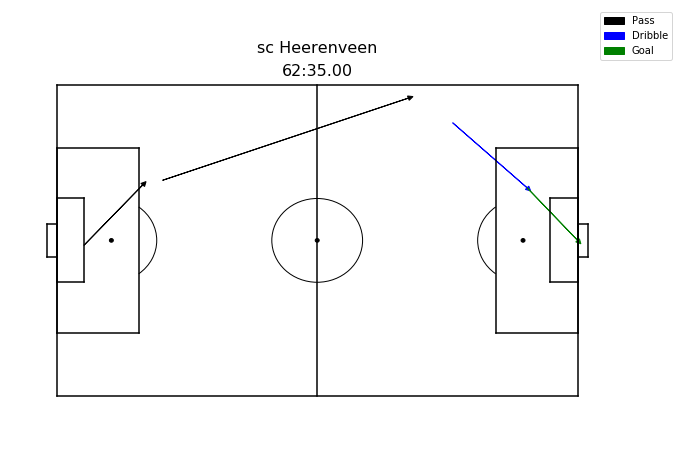

In [33]:
visualize_possession_chains([32], df_sh, possession_sh)